# Project 6 Linear Regression
Jensen Judkins, Samuel McMillan

In [4]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Read in the data
df = pd.read_csv("RRCA_baseflow.csv")


Below sets the date according to the offset given in the assignment description. Adds columns for year, month, day, and date which is the full date in the format of year-month-day.

In [6]:
#Offsetting the days
#Date has some idiosyncrasies. Take make it easier to work with, subtract 693963 from the value. The new value is the number of days since Jan 1, 1900.
offset = 693963
df['days_since_1900'] = df['Date'] - offset

#add month, year, and day columns
pd.period_range("1215-01-01", "1381-01-01", freq="D")
period = pd.Period('1900-1-1', freq='D') - pd.Period('0001-2-1', freq='D')
#period
df['days_since_1900'] = df.Date - offset
df['date'] = pd.to_datetime(df.days_since_1900.astype('int'), unit='D', origin=pd.Timestamp('1900-01-01'))
#display(df.head(2))
df.loc[0,'date'].month
df['year'] = df.date.apply(lambda x:pd.to_datetime(x).year)
df['month'] = df.date.apply(lambda x:pd.to_datetime(x).month)
df['day'] = df.date.apply(lambda x:pd.to_datetime(x).day)

df.head()


,Date,Segment_id,x,y,Evapotranspiration,Precipitation,Irrigation_pumping,Observed,days_since_1900,date,year,month,day
0,710732,144,1086190,14476800,0.59,18.99,0.0,0.145161,16769,1945-11-30,1945,11,30
1,710763,144,1086190,14476800,0.97,29.63,0.0,0.445161,16800,1945-12-31,1945,12,31
2,710791,144,1086190,14476800,1.34,29.63,0.0,1.332203,16828,1946-01-28,1946,1,28
3,710822,144,1086190,14476800,1.79,29.63,0.0,2.932203,16859,1946-02-28,1946,2,28
4,710852,144,1086190,14476800,8.23,29.63,0.0,3.728689,16889,1946-03-30,1946,3,30


KeyError: "['yObserved'] not in index"

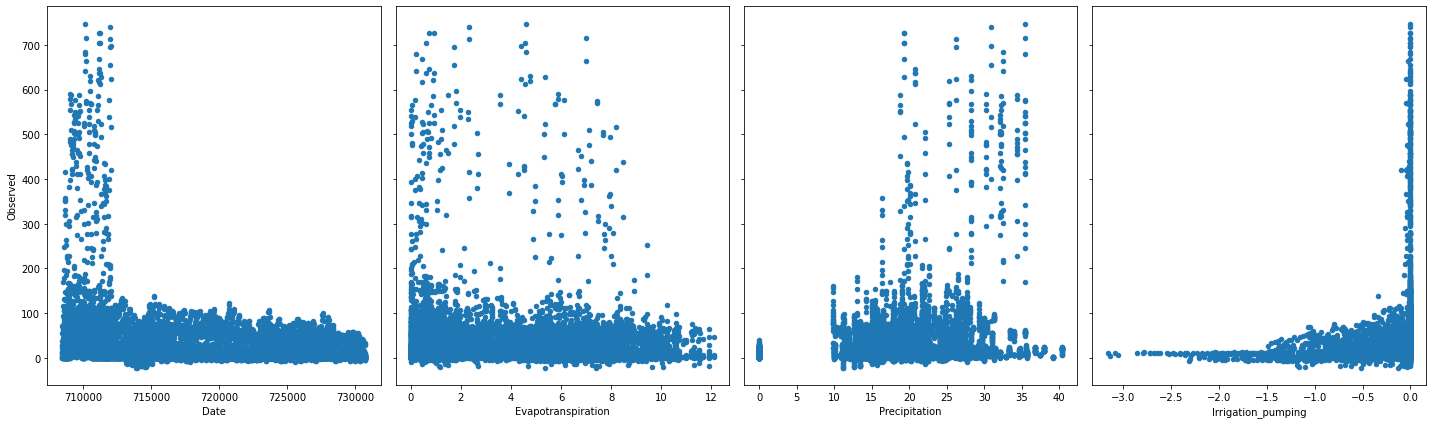

<Figure size 720x576 with 0 Axes>

In [13]:
# Visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 4, sharey=True, figsize=(20, 6))
df.plot(kind='scatter', x='Date', y='Observed', ax=axs[0])
df.plot(kind='scatter', x='Evapotranspiration', y='Observed', ax=axs[1])
df.plot(kind='scatter', x='Precipitation', y='Observed', ax=axs[2])
df.plot(kind='scatter', x='Irrigation_pumping', y='Observed', ax=axs[3])
plt.tight_layout()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df[['Segment_id', 'x', 'y''Observed']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()
